# Credit Card Analysis 

In [1]:
!pip install --user imblearn

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/tensorflow2_p36/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing dataset

## importing account dataset as acasc

In [3]:
acasc=pd.read_csv("https://drive.google.com/uc?export=download&id=1oIORnP6y7TRrVnnWhBakcyzr4v-XfAW0",sep=";")

## importing card dataset as cardasc

In [4]:
cardasc=pd.read_csv("https://drive.google.com/uc?export=download&id=1ksfsymSKldqWcYMWQqcOZsXFw0H1Sf-X",sep=";")

## importing client dataset as clientasc

In [5]:
clientasc=pd.read_csv("https://drive.google.com/uc?export=download&id=1TCtuy3slmqv02sDycY7AlkXVxCH_Y1xU",sep=";")

## importing disposition dataset as dispasc

In [6]:
dispasc=pd.read_csv("https://drive.google.com/uc?export=download&id=1V_KyTCqjEiaFQnC8gQhdQW8NgjrJp9KH",sep=";")

## importing district dataset as distasc

In [7]:
distasc=pd.read_csv("https://drive.google.com/uc?export=download&id=1vndUpEjEu1K1P5wgGA_NpHmmLIbLsRXy",sep=";")

## importing loan dataset as loanasc

In [8]:
loanasc=pd.read_csv("https://drive.google.com/uc?export=download&id=1Ex28rEwmE8JriScwJOY4aoovX3RuL1Ua",sep=";")

## importing order dataset as orderasc

In [9]:
orderasc=pd.read_csv("https://drive.google.com/uc?export=download&id=1DzKPa7ZS4nE0uZR6tgE2uns1pmlcxsI7",sep=";")

## importing transaction dataset as transasc

In [10]:
transasc=pd.read_csv("https://drive.google.com/uc?export=download&id=11MZiq_J78wDII48oGSL9D5PRqjk84DZ8",sep=";")

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)



Translated values as follows: given in task

POPLATEK MESICNE changed to MONTHLY ISSUANCE (MI)

POPLATEK TYDNE changed to WEEKLY ISSUANCE (WI)

POPLATEK PO OBRATU change to ISSUANCE AFTER TRANSACTION (TI)

In [11]:
frequency={"POPLATEK MESICNE" : "MI","POPLATEK TYDNE" : "WI" ,"POPLATEK PO OBRATU" : "TI"}

In [12]:
acasc["frequency"]=acasc["frequency"].map(frequency)

In [13]:
acasc["frequency"].value_counts()

MI    4167
WI     240
TI      93
Name: frequency, dtype: int64

#### DROPPING DATE COLUMN because date column was not contributing much on output variable and was also given in the task

In [14]:
acasc.drop("date",axis=1,inplace=True)

### Combining loan and transaction dataset based on account_id column because account dataset has account id as primary key and transaction datset has account id as foreign key


In [15]:
ln_ac=pd.merge(loanasc,transasc,on="account_id")
print(ln_ac.shape)
ln_ac.head()

(191556, 16)


,loan_id,account_id,date_x,amount_x,duration,payments,status,trans_id,date_y,type,operation,amount_y,balance,k_symbol,bank,account
0,5314,1787,930705,96396,12,8033.0,B,523621,930322,PRIJEM,VKLAD,1100.0,1100.0,NaN,NaN,NaN
1,5314,1787,930705,96396,12,8033.0,B,524054,930421,PRIJEM,VKLAD,9900.0,11000.0,NaN,NaN,NaN
2,5314,1787,930705,96396,12,8033.0,B,524055,930521,PRIJEM,VKLAD,5800.0,16800.0,NaN,NaN,NaN
3,5314,1787,930705,96396,12,8033.0,B,524056,930620,PRIJEM,VKLAD,3300.0,20100.0,NaN,NaN,NaN
4,5314,1787,930705,96396,12,8033.0,B,523624,930708,PRIJEM,VKLAD,42248.0,62348.0,NaN,NaN,NaN


### Combining account dataset with new combined dataset having both loan and transaction on the basis of account id

In [16]:
acc_ln_tr=pd.merge(acasc,ln_ac,on="account_id")
print(acc_ln_tr.shape)
acc_ln_tr.head()

(191556, 18)


,account_id,district_id,frequency,loan_id,date_x,amount_x,duration,payments,status,trans_id,date_y,type,operation,amount_y,balance,k_symbol,bank,account
0,5270,44,MI,6077,931122,79608,24,3317.0,A,1548749,930113,PRIJEM,VKLAD,800.0,800.0,NaN,NaN,NaN
1,5270,44,MI,6077,931122,79608,24,3317.0,A,1548750,930114,PRIJEM,PREVOD Z UCTU,44749.0,45549.0,NaN,IJ,80269753.0
2,5270,44,MI,6077,931122,79608,24,3317.0,A,3669814,930131,PRIJEM,NaN,110.2,45659.2,UROK,NaN,NaN
3,5270,44,MI,6077,931122,79608,24,3317.0,A,1549098,930212,VYDAJ,VYBER,9600.0,36059.2,NaN,NaN,NaN
4,5270,44,MI,6077,931122,79608,24,3317.0,A,1548751,930214,PRIJEM,PREVOD Z UCTU,44749.0,80808.2,NaN,IJ,80269753.0


### Combining district dataset with new combined dataset having loan, account and transaction based on district id

### Before merging district dataset we have to do data cleanig of district dataset

In [17]:
dst=pd.DataFrame(distasc["A1"])
dst=dst.rename(columns = {"A1":"district_id"})
dst

,district_id
0,1
1,2
2,3
3,4
4,5
...,...
72,73
73,74
74,75
75,76


In [18]:
acc_ln_tr_dst=pd.merge(dst,acc_ln_tr,on="district_id")
print(acc_ln_tr_dst.shape)
acc_ln_tr_dst.head()

(191556, 18)


,district_id,account_id,frequency,loan_id,date_x,amount_x,duration,payments,status,trans_id,date_y,type,operation,amount_y,balance,k_symbol,bank,account
0,1,9265,MI,6888,940711,39576,12,3298.0,A,2797771,930204,PRIJEM,VKLAD,300.0,300.0,NaN,NaN,NaN
1,1,9265,MI,6888,940711,39576,12,3298.0,A,2797779,930223,PRIJEM,VKLAD,28361.0,28661.0,NaN,NaN,NaN
2,1,9265,MI,6888,940711,39576,12,3298.0,A,3509732,930228,PRIJEM,NaN,21.3,28707.9,UROK,NaN,NaN
3,1,9265,MI,6888,940711,39576,12,3298.0,A,3479717,930228,PRIJEM,NaN,25.6,28686.6,UROK,NaN,NaN
4,1,9265,MI,6888,940711,39576,12,3298.0,A,2797781,930304,PRIJEM,VKLAD,37305.0,66012.9,NaN,NaN,NaN


### Combining credit card dataset with disposition dataset based on disposition id

In [19]:
cc_dsp=pd.merge(cardasc,dispasc,on="disp_id")
print(cc_dsp.shape)
cc_dsp.head()

(892, 7)


,card_id,disp_id,type_x,issued,client_id,account_id,type_y
0,1005,9285,classic,931107 00:00:00,9593,7753,OWNER
1,104,588,classic,940119 00:00:00,588,489,OWNER
2,747,4915,classic,940205 00:00:00,4915,4078,OWNER
3,70,439,classic,940208 00:00:00,439,361,OWNER
4,577,3687,classic,940215 00:00:00,3687,3050,OWNER


### Extracting client_sex and client_age from client dataset from birth_number column

In [20]:
clientasc["birth_number"]=clientasc["birth_number"].astype(str)

In [21]:
clientasc['client_sex'] = ["F" if x > 12 else "M" for x in clientasc['birth_number'].str.slice(2, 4).astype(int)]

In [22]:
clientasc['birth_number'] = [int(x)-5000 if  int(x[2:4]) > 12 else int(x) for x in clientasc['birth_number']]

In [23]:
clientasc["birth_number"]=pd.to_datetime(clientasc['birth_number'], format='%y%m%d')

In [24]:
clientasc['birth_number'] = np.where(clientasc['birth_number'].dt.year > 2000, clientasc['birth_number'] - pd.offsets.DateOffset(years=100), clientasc['birth_number'])

In [25]:
clientasc["birth_number"]=clientasc["birth_number"].dt.year

In [26]:
clientasc["client_age"]=2021-clientasc['birth_number']

In [27]:
clientasc.drop("birth_number",axis=1,inplace=True)
clientasc

,client_id,district_id,client_sex,client_age
0,1,18,F,51
1,2,1,M,76
2,3,1,F,81
3,4,5,M,65
4,5,5,F,61
...,...,...,...,...
5364,13955,1,F,76
5365,13956,1,M,78
5366,13968,61,M,53
5367,13971,67,F,59


#### Discretized value derived from BirthNumber attribute
Values:

1 = YOUTH (0 - 24)

2 = ADULT (24 - 35)

3 = MIDDLE-AGE (36 - 64)

4 = SENIOR (65 - *)

In [28]:
criteria = [clientasc['client_age'].between(0, 24), clientasc['client_age'].between(25, 36), clientasc['client_age'].between(37, 64),clientasc["client_age"].between(65,max(clientasc["client_age"]))]
values = [1, 2, 3,4]

In [29]:
clientasc['client_age'] = np.select(criteria, values, 0)

In [30]:
clientasc

,client_id,district_id,client_sex,client_age
0,1,18,F,3
1,2,1,M,4
2,3,1,F,4
3,4,5,M,4
4,5,5,F,3
...,...,...,...,...
5364,13955,1,F,4
5365,13956,1,M,4
5366,13968,61,M,3
5367,13971,67,F,3


### Categorizing male as 1 and female as 0¶

In [31]:
clientasc['client_sex'] = clientasc['client_sex'].map({'M': 1,'F': 0})

In [32]:
clientasc

,client_id,district_id,client_sex,client_age
0,1,18,0,3
1,2,1,1,4
2,3,1,0,4
3,4,5,1,4
4,5,5,0,3
...,...,...,...,...
5364,13955,1,0,4
5365,13956,1,1,4
5366,13968,61,1,3
5367,13971,67,0,3


### Combining client dataset with new combined dataset containing credit card and disposition based on client id


In [33]:
cc_dsp_client=pd.merge(clientasc,cc_dsp,on="client_id")

In [34]:
print(cc_dsp_client.shape)
cc_dsp_client.head()

(892, 10)


,client_id,district_id,client_sex,client_age,card_id,disp_id,type_x,issued,account_id,type_y
0,9,60,1,4,1,9,gold,981016 00:00:00,7,OWNER
1,19,47,1,4,2,19,classic,980313 00:00:00,14,OWNER
2,41,22,1,3,3,41,gold,950903 00:00:00,33,OWNER
3,42,68,1,4,4,42,classic,981126 00:00:00,34,OWNER
4,51,36,0,3,5,51,junior,950424 00:00:00,43,OWNER


### Combining combined datset of (account,loan,transaction,district) with combined dataset (disposition,credit card,client) on the basis of district id

In [35]:
final_merge=pd.merge(cc_dsp_client,acc_ln_tr_dst,on="district_id")

In [36]:
final_merge

,client_id,district_id,client_sex,client_age,card_id,disp_id,type_x,issued,account_id_x,type_y,...,status,trans_id,date_y,type,operation,amount_y,balance,k_symbol,bank,account
0,9,60,1,4,1,9,gold,981016 00:00:00,7,OWNER,...,A,894500,930508,PRIJEM,VKLAD,900.0,900.0,NaN,NaN,NaN
1,9,60,1,4,1,9,gold,981016 00:00:00,7,OWNER,...,A,895068,930607,PRIJEM,VKLAD,10500.0,11400.0,NaN,NaN,NaN
2,9,60,1,4,1,9,gold,981016 00:00:00,7,OWNER,...,A,894506,930608,PRIJEM,PREVOD Z UCTU,62168.0,73568.0,NaN,GH,69871258.0
3,9,60,1,4,1,9,gold,981016 00:00:00,7,OWNER,...,A,3631314,930630,PRIJEM,NaN,235.0,73803.0,UROK,NaN,NaN
4,9,60,1,4,1,9,gold,981016 00:00:00,7,OWNER,...,A,895069,930707,VYDAJ,VYBER,22600.0,51203.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5209377,4832,56,0,3,741,4832,classic,960911 00:00:00,4009,OWNER,...,C,387917,981212,VYDAJ,PREVOD NA UCET,2015.0,4559.9,POJISTNE,MN,13490295.0
5209378,4832,56,0,3,741,4832,classic,960911 00:00:00,4009,OWNER,...,C,387845,981212,VYDAJ,PREVOD NA UCET,5154.0,6574.9,UVER,ST,77757256.0
5209379,4832,56,0,3,741,4832,classic,960911 00:00:00,4009,OWNER,...,C,388023,981217,PRIJEM,VKLAD,15000.0,19559.9,NaN,NaN,NaN
5209380,4832,56,0,3,741,4832,classic,960911 00:00:00,4009,OWNER,...,C,387818,981226,PRIJEM,VKLAD,14557.0,34116.9,NaN,NaN,NaN


In [37]:
final_merge.columns

Index(['client_id', 'district_id', 'client_sex', 'client_age', 'card_id',
       'disp_id', 'type_x', 'issued', 'account_id_x', 'type_y', 'account_id_y',
       'frequency', 'loan_id', 'date_x', 'amount_x', 'duration', 'payments',
       'status', 'trans_id', 'date_y', 'type', 'operation', 'amount_y',
       'balance', 'k_symbol', 'bank', 'account'],
      dtype='object')

### After combining all dataset we have we have got 27 column but we have extracted only those columns which was said by our team lead

In [38]:
df=final_merge[["frequency",'client_age','district_id',"client_sex","status","balance","type_x"]]

In [39]:
df

,frequency,client_age,district_id,client_sex,status,balance,type_x
0,MI,4,60,1,A,900.0,gold
1,MI,4,60,1,A,11400.0,gold
2,MI,4,60,1,A,73568.0,gold
3,MI,4,60,1,A,73803.0,gold
4,MI,4,60,1,A,51203.0,gold
...,...,...,...,...,...,...,...
5209377,MI,3,56,0,C,4559.9,classic
5209378,MI,3,56,0,C,6574.9,classic
5209379,MI,3,56,0,C,19559.9,classic
5209380,MI,3,56,0,C,34116.9,classic


### Here our output feature is status and rest are independent that's why we have categorized status based on the
Status of loan pay-off

'A' = Contract finished, no problems

'B' = Contract finished, loan not payed

'C' = Contract running, OK thus-far

'D' = Contract running, client in debt

Here we categorized (A and C) as 1 and (B and D) as 0

In [40]:
df['status'] = df['status'].map({'A': 1,'C': 1,'B':0,'D':0})

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [41]:
import scipy.stats as stat
import pylab 

### Checking for normal distribution on the balance feature

In [42]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

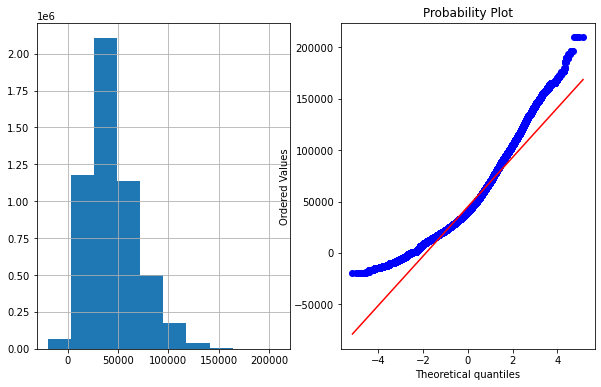

In [43]:
plot_data(df,'balance')

### As balance feature shows normal distribution there is no need to do any extra work for transformation¶

In [44]:
df

,frequency,client_age,district_id,client_sex,status,balance,type_x
0,MI,4,60,1,1,900.0,gold
1,MI,4,60,1,1,11400.0,gold
2,MI,4,60,1,1,73568.0,gold
3,MI,4,60,1,1,73803.0,gold
4,MI,4,60,1,1,51203.0,gold
...,...,...,...,...,...,...,...
5209377,MI,3,56,0,1,4559.9,classic
5209378,MI,3,56,0,1,6574.9,classic
5209379,MI,3,56,0,1,19559.9,classic
5209380,MI,3,56,0,1,34116.9,classic


### Applying one hot encoding on all categorical column(frequency & card type)

In [45]:
dum_df = pd.get_dummies(df, columns=["frequency"])

In [46]:
df1= pd.get_dummies(dum_df, columns=["type_x"])
df1

,client_age,district_id,client_sex,status,balance,frequency_MI,frequency_TI,frequency_WI,type_x_classic,type_x_gold,type_x_junior
0,4,60,1,1,900.0,1,0,0,0,1,0
1,4,60,1,1,11400.0,1,0,0,0,1,0
2,4,60,1,1,73568.0,1,0,0,0,1,0
3,4,60,1,1,73803.0,1,0,0,0,1,0
4,4,60,1,1,51203.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
5209377,3,56,0,1,4559.9,1,0,0,1,0,0
5209378,3,56,0,1,6574.9,1,0,0,1,0,0
5209379,3,56,0,1,19559.9,1,0,0,1,0,0
5209380,3,56,0,1,34116.9,1,0,0,1,0,0


### Splitting independent and dependent features

In [47]:
X=df1.drop("status",axis=1)

#### This are independent features¶ 

In [48]:
X

,client_age,district_id,client_sex,balance,frequency_MI,frequency_TI,frequency_WI,type_x_classic,type_x_gold,type_x_junior
0,4,60,1,900.0,1,0,0,0,1,0
1,4,60,1,11400.0,1,0,0,0,1,0
2,4,60,1,73568.0,1,0,0,0,1,0
3,4,60,1,73803.0,1,0,0,0,1,0
4,4,60,1,51203.0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
5209377,3,56,0,4559.9,1,0,0,1,0,0
5209378,3,56,0,6574.9,1,0,0,1,0,0
5209379,3,56,0,19559.9,1,0,0,1,0,0
5209380,3,56,0,34116.9,1,0,0,1,0,0


In [49]:
y=df1["status"]

#### This is dependent feature

In [50]:
y

0          1
1          1
2          1
3          1
4          1
          ..
5209377    1
5209378    1
5209379    1
5209380    1
5209381    1
Name: status, Length: 5209382, dtype: int64

### Checking ouput feature if it is balanced or not

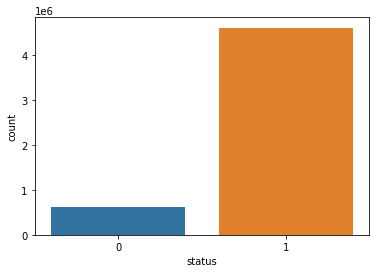

In [51]:
sns.countplot(x="status", data=df1);

### Here we found that our ouput feature is not balanced so we are perforing undersampling and upsampling to make our output feature balanced


### UnderSampling

In [52]:
from imblearn.under_sampling import NearMiss

In [53]:
nm = NearMiss()

In [54]:
X_res,y_res=nm.fit_resample(X,y)

In [55]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 4600117, 0: 609265})
Resampled dataset shape Counter({0: 609265, 1: 609265})


### Applying Logistic Regression on Undersampling

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, roc_auc_score

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,train_size=0.7)


In [58]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [59]:
lrtr_pred=log_reg.predict(X_train)
print("Training Accuracy of Logistic Regression on Undersampling")
print(confusion_matrix(y_train,lrtr_pred))
print(accuracy_score(y_train,lrtr_pred))
print(classification_report(y_train,lrtr_pred))

Training Accuracy of Logistic Regression on Undersampling
[[158643 268018]
 [ 68542 357768]]
0.6054262102697513
              precision    recall  f1-score   support

           0       0.70      0.37      0.49    426661
           1       0.57      0.84      0.68    426310

    accuracy                           0.61    852971
   macro avg       0.64      0.61      0.58    852971
weighted avg       0.64      0.61      0.58    852971



In [60]:
lrts_pred=log_reg.predict(X_test)
print("Testing Accuracy of Logistic Regression on Undersampling")
print(confusion_matrix(y_test,lrts_pred))
print(accuracy_score(y_test,lrts_pred))
print(classification_report(y_test,lrts_pred))

Testing Accuracy of Logistic Regression on Undersampling
[[ 67776 114828]
 [ 29350 153605]]
0.6055958135348877
              precision    recall  f1-score   support

           0       0.70      0.37      0.48    182604
           1       0.57      0.84      0.68    182955

    accuracy                           0.61    365559
   macro avg       0.64      0.61      0.58    365559
weighted avg       0.63      0.61      0.58    365559



### Applying Decision Tree on Undersampling

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [63]:
dttr_pred=dtree.predict(X_train)
print("Training Accuracy of Decision Tree on Undersampling")
print(confusion_matrix(y_train,dttr_pred))
print(accuracy_score(y_train,dttr_pred))
print(classification_report(y_train,dttr_pred))

Training Accuracy of Decision Tree on Undersampling
[[424223   2438]
 [  2402 423908]]
0.9943257156456667
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    426661
           1       0.99      0.99      0.99    426310

    accuracy                           0.99    852971
   macro avg       0.99      0.99      0.99    852971
weighted avg       0.99      0.99      0.99    852971



In [64]:
dtts_pred=dtree.predict(X_test)
print("Testing Accuracy of Decision Tree on Undersampling")
print(confusion_matrix(y_test,dtts_pred))
print(accuracy_score(y_test,dtts_pred))
print(classification_report(y_test,dtts_pred))

Testing Accuracy of Decision Tree on Undersampling
[[181038   1566]
 [  1349 181606]]
0.9920259110020544
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    182604
           1       0.99      0.99      0.99    182955

    accuracy                           0.99    365559
   macro avg       0.99      0.99      0.99    365559
weighted avg       0.99      0.99      0.99    365559



### Applying Random Forest on Undersampling

In [65]:
class_weight=dict({0:1,1:100})
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight=class_weight)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [66]:
rftr_pred=rf.predict(X_train)
print("Training Accuracy of Random Forest on Undersampling")
print(confusion_matrix(y_train,rftr_pred))
print(accuracy_score(y_train,rftr_pred))
print(classification_report(y_train,rftr_pred))

Training Accuracy of Random Forest on Undersampling
[[421407   5254]
 [    10 426300]]
0.9938286295782623
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    426661
           1       0.99      1.00      0.99    426310

    accuracy                           0.99    852971
   macro avg       0.99      0.99      0.99    852971
weighted avg       0.99      0.99      0.99    852971



In [67]:
rfts_pred=rf.predict(X_test)
print("Testing Accuracy of Random Forest on Undersampling")
print(confusion_matrix(y_test,rfts_pred))
print(accuracy_score(y_test,rfts_pred))
print(classification_report(y_test,rfts_pred))

Testing Accuracy of Random Forest on Undersampling
[[175849   6755]
 [  4147 178808]]
0.9701771807013368
              precision    recall  f1-score   support

           0       0.98      0.96      0.97    182604
           1       0.96      0.98      0.97    182955

    accuracy                           0.97    365559
   macro avg       0.97      0.97      0.97    365559
weighted avg       0.97      0.97      0.97    365559



### ROC & AUC Curve on undersampling of all models of testing prediction

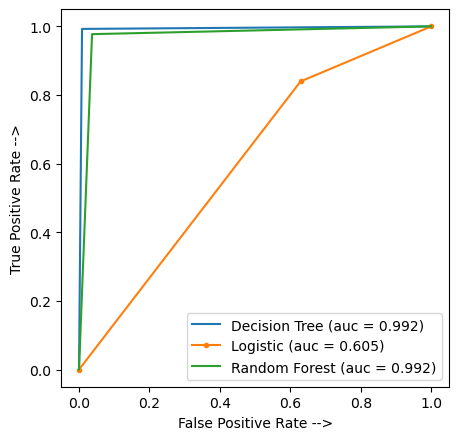

In [68]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, lrts_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, dtts_pred)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, rfts_pred)
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest (auc = %0.3f)' % auc_dt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### We have applied logistic regression,decision tree and random forest on undersampled dataset and we have found that decision tree and random forest has given very good accuracy

### UpSampling

In [69]:
from imblearn.combine import SMOTETomek

In [70]:
smk = SMOTETomek(random_state=42)
Xu_res,yu_res=smk.fit_resample(X,y)

In [71]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(yu_res)))

Original dataset shape Counter({1: 4600117, 0: 609265})
Resampled dataset shape Counter({1: 4599754, 0: 4599754})


### Applying Logistic Regression on Upsampling

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, roc_auc_score

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xu_res,yu_res,train_size=0.7)


In [75]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [76]:
lrtr_pred=log_reg.predict(X_train)
print("Training Accuracy of Logistic Regression on Upsampling")
print(confusion_matrix(y_train,lrtr_pred))
print(accuracy_score(y_train,lrtr_pred))
print(classification_report(y_train,lrtr_pred))

Training Accuracy of Logistic Regression on Upsampling
[[2029918 1189867]
 [1490471 1729399]]
0.583776149498692
              precision    recall  f1-score   support

           0       0.58      0.63      0.60   3219785
           1       0.59      0.54      0.56   3219870

    accuracy                           0.58   6439655
   macro avg       0.58      0.58      0.58   6439655
weighted avg       0.58      0.58      0.58   6439655



In [77]:
lrts_pred=log_reg.predict(X_test)
print("Testing Accuracy of Logistic Regression on Upsampling")
print(confusion_matrix(y_test,lrts_pred))
print(accuracy_score(y_test,lrts_pred))
print(classification_report(y_test,lrts_pred))

Testing Accuracy of Logistic Regression on Upsampling
[[869941 510028]
 [639521 740363]]
0.583474554623018
              precision    recall  f1-score   support

           0       0.58      0.63      0.60   1379969
           1       0.59      0.54      0.56   1379884

    accuracy                           0.58   2759853
   macro avg       0.58      0.58      0.58   2759853
weighted avg       0.58      0.58      0.58   2759853



### Applying Decision Tree on Upsampling

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
dttr_pred=dtree.predict(X_train)
print("Training Accuracy of Decision Tree on Upsampling")
print(confusion_matrix(y_train,dttr_pred))
print(accuracy_score(y_train,dttr_pred))
print(classification_report(y_train,dttr_pred))

Training Accuracy of Decision Tree on Upsampling
[[3219774      11]
 [   6842 3213028]]
0.9989358125551757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   3219785
           1       1.00      1.00      1.00   3219870

    accuracy                           1.00   6439655
   macro avg       1.00      1.00      1.00   6439655
weighted avg       1.00      1.00      1.00   6439655



In [81]:
dtts_pred=dtree.predict(X_test)
print("Testing Accuracy of Decision Tree on Upsampling")
print(confusion_matrix(y_test,dtts_pred))
print(accuracy_score(y_test,dtts_pred))
print(classification_report(y_test,dtts_pred))

Testing Accuracy of Decision Tree on Upsampling
[[1375405    4564]
 [  12192 1367692]]
0.9939286621425126
              precision    recall  f1-score   support

           0       0.99      1.00      0.99   1379969
           1       1.00      0.99      0.99   1379884

    accuracy                           0.99   2759853
   macro avg       0.99      0.99      0.99   2759853
weighted avg       0.99      0.99      0.99   2759853



### Applying Random Forest on Upsampling

In [82]:
class_weight=dict({0:1,1:100})
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(class_weight=class_weight)
rf.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 100})

In [83]:
rftr_pred=rf.predict(X_train)
print("Training Accuracy of Random Forest on Upsampling")
print(confusion_matrix(y_train,rftr_pred))
print(accuracy_score(y_train,rftr_pred))
print(classification_report(y_train,rftr_pred))

Training Accuracy of Random Forest on Upsampling
[[3180365   39420]
 [     53 3219817]]
0.9938703237984022
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   3219785
           1       0.99      1.00      0.99   3219870

    accuracy                           0.99   6439655
   macro avg       0.99      0.99      0.99   6439655
weighted avg       0.99      0.99      0.99   6439655



In [84]:
rfts_pred=rf.predict(X_test)
print("Testing Accuracy of Random Forest on Upsampling")
print(confusion_matrix(y_test,rfts_pred))
print(accuracy_score(y_test,rfts_pred))
print(classification_report(y_test,rfts_pred))

Testing Accuracy of Random Forest on Upsampling
[[1358361   21608]
 [  11978 1367906]]
0.9878305112627376
              precision    recall  f1-score   support

           0       0.99      0.98      0.99   1379969
           1       0.98      0.99      0.99   1379884

    accuracy                           0.99   2759853
   macro avg       0.99      0.99      0.99   2759853
weighted avg       0.99      0.99      0.99   2759853



### ROC & AUC Curve on upsampling of all models of testing prediction

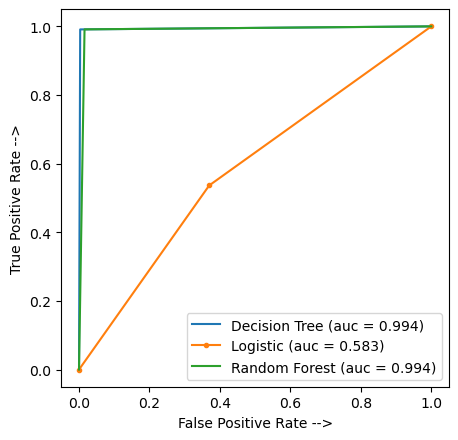

In [85]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, lrts_pred)
auc_logistic = auc(logistic_fpr, logistic_tpr)

dt_fpr, dt_tpr, threshold = roc_curve(y_test, dtts_pred)
auc_dt = auc(dt_fpr, dt_tpr)

rf_fpr, rf_tpr, threshold = roc_curve(y_test, rfts_pred)
auc_rf = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='Decision Tree (auc = %0.3f)' % auc_dt)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)
plt.plot(rf_fpr, rf_tpr, linestyle='-', label='Random Forest (auc = %0.3f)' % auc_dt)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

### We have applied logistic regression,decision tree and random forest on upsampled dataset and this time we have found that decision tree and random forest has given more accuracy than that of undersampled data¶

### Now we are checking for feature importance of decision tree model that which feature has more predictive power

In [86]:
fi=pd.DataFrame({"Feature Name" : X.columns,"Importance":dtree.feature_importances_})

In [87]:
fi.sort_values(by=['Importance'],ascending=False)

,Feature Name,Importance
3,balance,0.805917
1,district_id,0.120191
8,type_x_gold,0.019504
4,frequency_MI,0.014673
6,frequency_WI,0.011123
7,type_x_classic,0.009693
5,frequency_TI,0.008609
2,client_sex,0.004352
0,client_age,0.003037
9,type_x_junior,0.002901


### we have found that balance feature has more predictive power than all of the other features which has highest value